# Analisis Exploratorio TP1

In [1]:
import numpy as np 
import pandas as pd
import datetime

import seaborn as sns

from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
stations = pd.read_csv("Data/station.csv")
stations.head()


,id,name,lat,long,dock_count,city,installation_date
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,8/5/2013
2,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose,8/6/2013
3,5,Adobe on Almaden,37.331415,-121.893200,19,San Jose,8/5/2013
4,6,San Pedro Square,37.336721,-121.894074,15,San Jose,8/7/2013


La cantidad de estaciones es:

In [3]:
print (str(len(stations.id.unique())))
print (str((stations.city.unique())))

70
['San Jose' 'Redwood City' 'Mountain View' 'Palo Alto' 'San Francisco']


Los nombres de las 70 estaciones son:

In [4]:
print (stations.name.unique()) 
print (stations.id.unique())

['San Jose Diridon Caltrain Station' 'San Jose Civic Center'
 'Santa Clara at Almaden' 'Adobe on Almaden' 'San Pedro Square'
 'Paseo de San Antonio' 'San Salvador at 1st' 'Japantown'
 'San Jose City Hall' 'MLK Library' 'SJSU 4th at San Carlos'
 'St James Park' 'Arena Green / SAP Center' 'SJSU - San Salvador at 9th'
 'Franklin at Maple' 'Redwood City Caltrain Station'
 'San Mateo County Center' 'Redwood City Public Library'
 'Stanford in Redwood City' 'Redwood City Medical Center'
 'Mountain View City Hall' 'Mountain View Caltrain Station'
 'San Antonio Caltrain Station' 'Evelyn Park and Ride'
 'San Antonio Shopping Center' 'Castro Street and El Camino Real'
 'Rengstorff Avenue / California Street' 'Palo Alto Caltrain Station'
 'University and Emerson' 'California Ave Caltrain Station'
 'Cowper at University' 'Park at Olive' 'Clay at Battery'
 'Davis at Jackson' 'Commercial at Montgomery' 'Washington at Kearney'
 'Post at Kearney' 'Embarcadero at Vallejo' 'Spear at Folsom'
 'Harry Bridg

Cantidad de "docks" (espacios para estacionar las bicicletas):

In [5]:
print (str(stations.dock_count.sum()))

1236


¿Las estaciones fueron instaladas el mismo día?

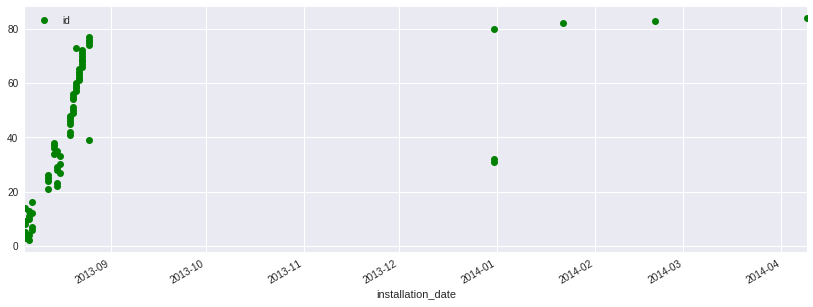

In [6]:
stations_installed = stations
stations_installed.installation_date = pd.to_datetime(stations_installed.installation_date, format='%m/%d/%Y') #Pase a formato datetime las fechas porque es mas comodo
stations_installed.plot(x='installation_date' , y = 'id', style='go',figsize=(14,5))

plt.show()


In [7]:
trips = pd.read_csv("Data/trip.csv")
trips.start_date = pd.to_datetime(trips.start_date, format='%m/%d/%Y %H:%M') #Pase a formato datetime las fechas porque es mas comodo
trips.end_date = pd.to_datetime(trips.end_date, format='%m/%d/%Y %H:%M')
trips.head()


,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
0,4576,63,2013-08-29 14:13:00,South Van Ness at Market,66,2013-08-29 14:14:00,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,2013-08-29 14:42:00,San Jose City Hall,10,2013-08-29 14:43:00,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,2013-08-29 10:16:00,Mountain View City Hall,27,2013-08-29 10:17:00,Mountain View City Hall,27,48,Subscriber,97214
3,4251,77,2013-08-29 11:29:00,San Jose City Hall,10,2013-08-29 11:30:00,San Jose City Hall,10,26,Subscriber,95060
4,4299,83,2013-08-29 12:02:00,South Van Ness at Market,66,2013-08-29 12:04:00,Market at 10th,67,319,Subscriber,94103


Analizamos si figuran la misma cantidad de estaciones que en stations.csv

¿Las estaciones que figuran en stations.csv coinciden con las que se registraron en trip.csv? 

In [10]:
print (str(len(trips.start_station_id.unique())))
print (str(len(trips.end_station_id.unique())))
print (str(len(trips.start_station_name.unique())))
print (str(len(trips.end_station_name.unique())))

print (str((trips.start_station_id.unique())))

70
70
74
74
[66 10 27 59  4  8 49  6 28 64 41 47 67 74 39 22 58 56  9 55  3 26 61 72 45
 76 62 46 35 68  5 71 69 73 48 75 70 11 50 77 65 60 30 42 34 54 57 23 37 51
 13 63  2  7 36 29 33 14 12 21 38 24 16 25 80 32 31 82 83 84]


Vemos que figuran 74 estaciones nombradas diferente pero seguimos contando 70 stations id.
Veamos si los 70 ids de ambos csv coinciden. Lo mismo para los nombres.

In [11]:
# print (str(len(df.start_station_name.unique())))
stations_d = {}
for name in stations.name:
    stations_d[name] = 0;

stations_x = {}
for name in trips.start_station_name:
    if name not in stations_d:
        if name in stations_x:
            stations_x [name] += 1
        else:
            stations_x[name] = 0
stations_x = {}
for name in trips.end_station_name:
    if name not in stations_d:
        if name in stations_x:
            stations_x [name] += 1
        else:
            stations_x[name] = 0
        
        
print(stations_x)  

{'Broadway at Main': 80, 'San Jose Government Center': 22, 'Washington at Kearny': 5460, 'Post at Kearny': 6958}


In [12]:

print ([x for x in  list(set(trips.start_station_name.unique())) if x not in list(set(stations.name.unique()))])

print ([x for x in  list(set(trips.start_station_id.unique())) if x not in list(set(stations.id.unique()))])

print (trips.loc[trips['start_station_name'] == 'San Jose Government Center','start_station_id'].unique(), trips.loc[trips['start_station_name'] == 'Washington at Kearny','start_station_id'].unique(), trips.loc[trips['start_station_name'] == 'Post at Kearny','start_station_id'].unique(), trips.loc[trips['start_station_name'] == 'Broadway at Main','start_station_id'].unique())

['Broadway at Main', 'Post at Kearny', 'San Jose Government Center', 'Washington at Kearny']
[]
[80] [46] [47] [25]


Los ids presentes en ambos csv son los mismos, la diferencia esta en los nombres de las estaciones. Para las estaciones con id: 25, 46, 47, 80 los nombres no coinciden con la informacion registrada en stations.csv
Comparemos como se dan las diferencias:

In [13]:
d={}
dok = {}

for id in stations.id.unique():   
    d[id] = list((set((trips.loc[trips['start_station_id'] == id, 'start_station_name']).tolist())))
    dok[id] = (stations.loc[stations['id'] == id, 'name']).to_string()

    
test =  pd.DataFrame(dok.items(), columns=['id','station_name'])
test = test.set_index('id')
test['trips_names'] = pd.Series(d, name='name')

test.head(70)


PandasError: DataFrame constructor not properly called!

Conclusion:
    Los ids se respetan con su correspondiente estación.
Tenemos casos mal seteados:
        id: 25 corresponde a la estación: Stanford in Redwood City. En los registros de viajes es usado para      Stanford in Redwood City y Broadway at Main.
        id: 46 corresponde a la estación: Washington at Kearney. En los registros de viajes es usasdo para Washington at Kearney, Washington at Kearny. En este caso claramente el error es de tipeo.
        id: 47 corresponde a la estación: Post at Kearney En los registros de viajes es usasdo para Post at Kearney y Post at Kearny. Ocurre lo mismo que para el punto anterior
        id: 80 corresponde a la estación: Santa Clara County Civic Center. En los registros de viajes es usado para San Jose Government Center y Santa Clara County Civic Center

In [14]:
print (trips.loc[trips['start_station_name'] == 'San Jose Government Center','start_station_id'].count())
print (trips.loc[trips['end_station_name'] == 'San Jose Government Center','end_station_id'].count())
print (trips.loc[trips['start_station_name'] == 'Washington at Kearny','start_station_id'].count())
print (trips.loc[trips['end_station_name'] == 'Washington at Kearny','end_station_id'].count())
print (trips.loc[trips['start_station_name'] == 'Post at Kearny','start_station_id'].count())
print (trips.loc[trips['end_station_name'] == 'Post at Kearny','end_station_id'].count())
print (trips.loc[trips['start_station_name'] == 'Broadway at Main','start_station_id'].count())
print (trips.loc[trips['end_station_name'] == 'Broadway at Main','end_station_id'].count())

23
23
4292
5461
6960
6959
67
81


Opciones:
    Dado al hecho que para el primer y último caso son muy pocos los registros podríamos a borrar todas aquellas filas cuyo station name sea uno de esos. Para los casos 2 y 3 se corregiría Kearny por Kearney
    Borrar todos los casos que presenten estos station names
    Dejar todos y no hacer nada

In [15]:
print (str(len(trips.zip_code.unique())))

7440


Las duraciones están en segundos, para el análisis conviene pasar a minuto.

In [16]:
trips_in_minute = trips
trips_in_minute.duration /= 60
trips_in_minute.head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
0,4576,1.050000,2013-08-29 14:13:00,South Van Ness at Market,66,2013-08-29 14:14:00,South Van Ness at Market,66,520,Subscriber,94127
1,4607,1.166667,2013-08-29 14:42:00,San Jose City Hall,10,2013-08-29 14:43:00,San Jose City Hall,10,661,Subscriber,95138
2,4130,1.183333,2013-08-29 10:16:00,Mountain View City Hall,27,2013-08-29 10:17:00,Mountain View City Hall,27,48,Subscriber,97214
3,4251,1.283333,2013-08-29 11:29:00,San Jose City Hall,10,2013-08-29 11:30:00,San Jose City Hall,10,26,Subscriber,95060
4,4299,1.383333,2013-08-29 12:02:00,South Van Ness at Market,66,2013-08-29 12:04:00,Market at 10th,67,319,Subscriber,94103


Verificamos si hay datos nulos:

In [17]:
trips_in_minute.isnull().sum()

id                       0
duration                 0
start_date               0
start_station_name       0
start_station_id         0
end_date                 0
end_station_name         0
end_station_id           0
bike_id                  0
subscription_type        0
zip_code              6619
dtype: int64

Resumen estadístico del dataframe:

In [18]:
trips_in_minute.describe()

,id,duration,start_station_id,end_station_id,bike_id
count,669959.000000,669959.000000,669959.000000,669959.000000,669959.000000
mean,460382.009899,18.465831,57.851876,57.837438,427.587620
std,264584.458487,370.923950,17.112474,17.200142,153.450988
min,4069.000000,1.000000,2.000000,2.000000,9.000000
25%,231082.500000,5.733333,50.000000,50.000000,334.000000
50%,459274.000000,8.616667,62.000000,62.000000,440.000000
75%,692601.000000,12.583333,70.000000,70.000000,546.000000
max,913460.000000,287840.000000,84.000000,84.000000,878.000000


Tenemos un mínimo de 1 minuto, lo que no va a ser considerado como viaje.
y un máximo de 287840 lo que corresponde a 199.9 días.

Por lo tanto vamos a graficar las duraciones por viaje para identificar valores outliers y luego recortar esos datos.

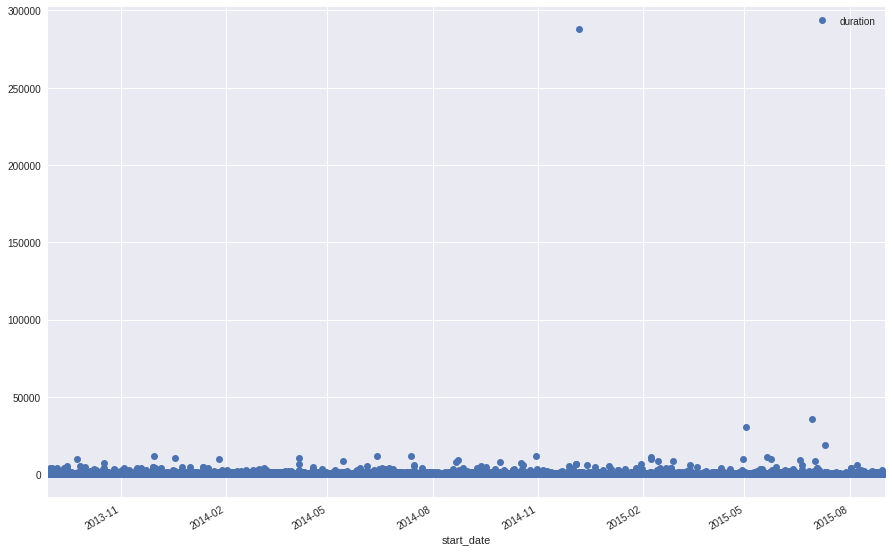

In [19]:
trips_in_minute.plot(x='start_date' , y = 'duration', style='o',figsize=(15,10))

plt.show()

Analizando el gráfico y los valores que se vieron en el resumen estadístico vamos a recortar aquellos viajes cuya duración sea menor a 370 minutos y mayor a 3 minutos.

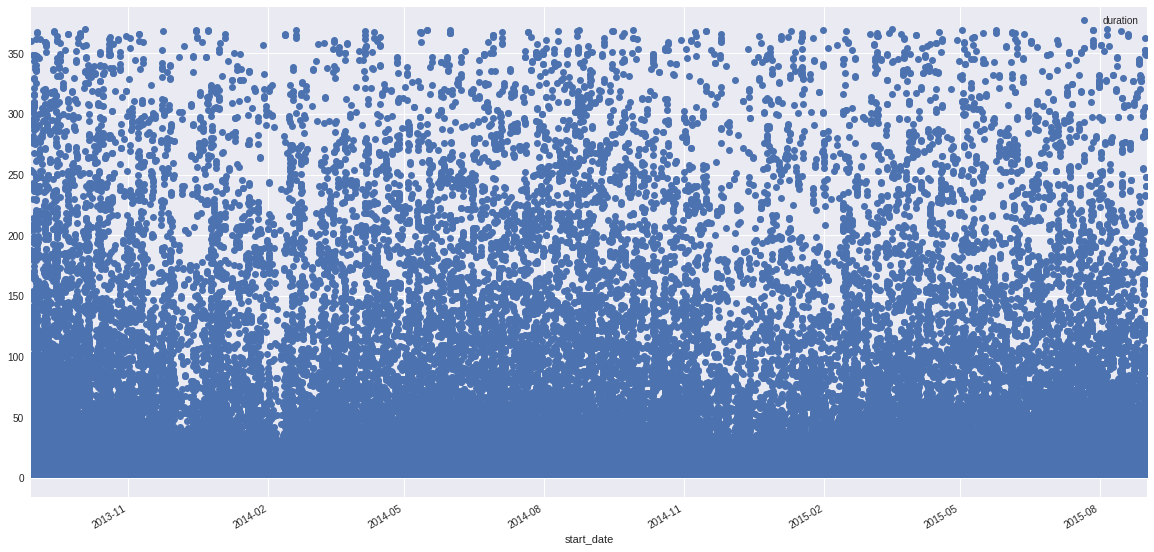

In [20]:
trips_in_minute = trips_in_minute[trips_in_minute.duration <= 370]
trips_in_minute = trips_in_minute[trips_in_minute.duration >3]

trips_in_minute.plot(x='start_date' , y = 'duration', style='o',figsize=(20,10))

plt.show()

Podemos ver una zona muy oscura entre los viajes de duración entre 3 y 50 minutos.

Ahora vamos a analizar la cantidad de viajes contra los distintos días de la semana.

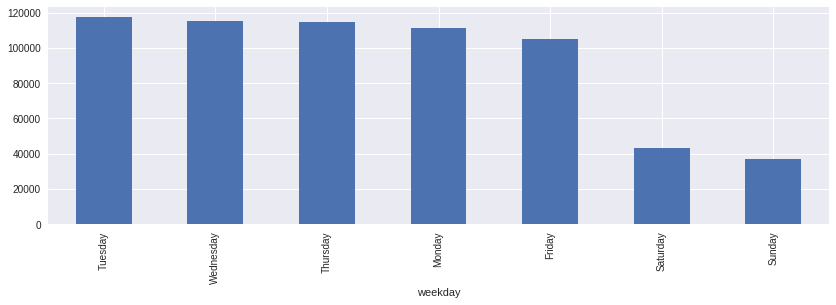

In [21]:
trips_in_minute['weekday'] =  pd.to_datetime(trips_in_minute['start_date']).dt.weekday_name
trips_in_minute.groupby('weekday').count()['start_date'].sort_values(ascending=False)[0:19].plot(kind='bar',figsize=(14,4));

Vemos que los fines de semana se realiazaron notablemente menor cantidad de viajes.

Podemos ahora analizar la duración promedio de los viajes para cada dia de semana

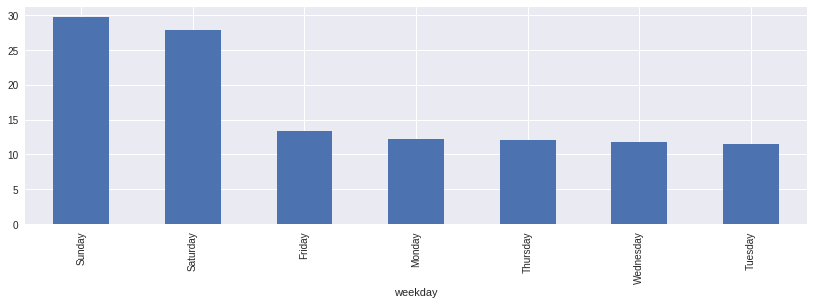

In [22]:
trips_in_minute.groupby('weekday').mean()['duration'].sort_values(ascending=False)[0:7].plot(kind='bar',figsize=(14,4));

El último grafico nos muestra claramente que los fines de semana la duración de los viajes es mucho mayor que la de los días de semana.

Ahora analizemos la cantidad de viajes segun el mes: 

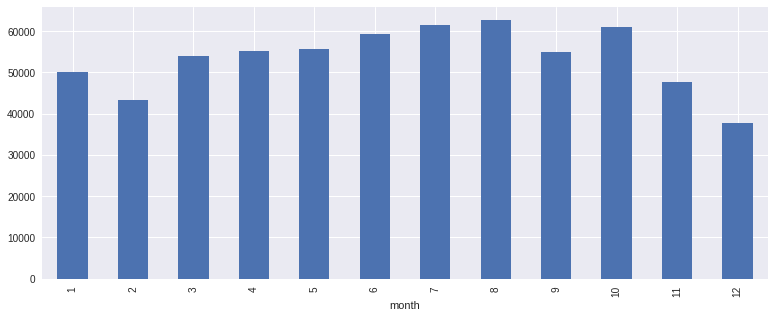

In [23]:
trips_in_minute['month'] =  pd.to_datetime(trips_in_minute['start_date']).dt.month

trips_in_minute.groupby('month').count()['start_date'][0:12].plot(kind='bar',figsize=(13,5));

Ahora podríamos ver el clima según los meses para comprender mejor los resultados del gráfico anterior

In [24]:
weathers = pd.read_csv("Data/weather.csv")
weathers['month'] =  pd.to_datetime(weathers['date']).dt.month
weathers.head()

,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code,month
0,8/29/2013,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,...,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,94107,8
1,8/30/2013,78.0,69.0,60.0,61.0,58.0,56.0,90.0,70.0,50.0,...,7.0,29.0,13.0,35.0,0,2.0,NaN,291.0,94107,8
2,8/31/2013,71.0,64.0,57.0,57.0,56.0,54.0,93.0,75.0,57.0,...,10.0,26.0,15.0,31.0,0,4.0,NaN,284.0,94107,8
3,9/1/2013,74.0,66.0,58.0,60.0,56.0,53.0,87.0,68.0,49.0,...,10.0,25.0,13.0,29.0,0,4.0,NaN,284.0,94107,9
4,9/2/2013,75.0,69.0,62.0,61.0,60.0,58.0,93.0,77.0,61.0,...,6.0,23.0,12.0,30.0,0,6.0,NaN,277.0,94107,9


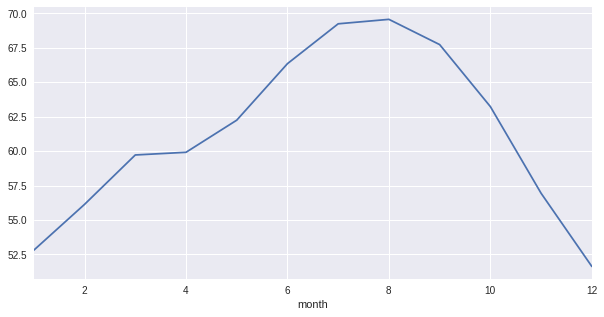

In [28]:
weathers.groupby('month').mean()['mean_temperature_f'][0:12].plot(kind='line',figsize=(10,5));

Vemos que el promedio de temperaturas más altas se registra entre los meses de junio y octubre, lo que coincide con el incremento en la cantidad de viajes en esos meses, de todos modos no explicaría el pico de enero.

Analizamos como influye las precipitaciones a la cantidad de viaje.

In [29]:
# Convierto el campo date en datetime
weather_convert = weathers
weather_convert.date = pd.to_datetime(weather_convert.date)
weather_convert.precipitation_inches = pd.to_numeric(weather_convert.precipitation_inches, errors='coerce')
weather_convert = weather_convert[np.isfinite(weather_convert['precipitation_inches'])]
weather_convert.head()

,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code,month
0,2013-08-29,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,...,10.0,23.0,11.0,28.0,0.0,4.0,NaN,286.0,94107,8
1,2013-08-30,78.0,69.0,60.0,61.0,58.0,56.0,90.0,70.0,50.0,...,7.0,29.0,13.0,35.0,0.0,2.0,NaN,291.0,94107,8
2,2013-08-31,71.0,64.0,57.0,57.0,56.0,54.0,93.0,75.0,57.0,...,10.0,26.0,15.0,31.0,0.0,4.0,NaN,284.0,94107,8
3,2013-09-01,74.0,66.0,58.0,60.0,56.0,53.0,87.0,68.0,49.0,...,10.0,25.0,13.0,29.0,0.0,4.0,NaN,284.0,94107,9
4,2013-09-02,75.0,69.0,62.0,61.0,60.0,58.0,93.0,77.0,61.0,...,6.0,23.0,12.0,30.0,0.0,6.0,NaN,277.0,94107,9


In [31]:
weather_convert.describe()

,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,max_sea_level_pressure_inches,...,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,wind_dir_degrees,zip_code,month
count,3518.000000,3518.000000,3518.000000,3468.000000,3468.000000,3468.000000,3468.000000,3468.000000,3468.000000,3521.000000,...,3509.000000,3509.000000,3521.000000,3521.000000,2624.000000,3521.000000,3521.000000,3521.000000,3521.000000,3521.000000
mean,70.636725,61.317794,51.839682,53.098039,48.696943,44.183391,85.414937,67.147924,46.189158,30.074848,...,9.827586,8.238245,16.292247,5.884124,22.210366,0.020943,2.696961,266.735302,94323.059642,6.551548
std,8.417891,7.263095,7.468626,6.938659,7.875335,9.405449,9.311826,11.039107,14.465916,0.135123,...,1.488716,2.871776,7.866108,3.325381,9.763890,0.144456,2.243403,103.148455,402.360521,3.454530
min,44.000000,38.000000,25.000000,20.000000,13.000000,2.000000,24.000000,24.000000,4.000000,29.500000,...,4.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,1.000000,94041.000000,1.000000
25%,64.000000,56.000000,47.000000,49.000000,44.000000,39.000000,82.000000,61.000000,37.000000,29.980000,...,10.000000,7.000000,13.000000,3.000000,17.000000,0.000000,1.000000,255.000000,94063.000000,4.000000
50%,70.000000,61.000000,53.000000,54.000000,49.000000,46.000000,86.000000,68.000000,48.000000,30.060000,...,10.000000,10.000000,16.000000,6.000000,22.000000,0.000000,2.000000,297.000000,94107.000000,7.000000
75%,77.000000,67.000000,57.000000,58.000000,55.000000,52.000000,93.000000,74.000000,56.000000,30.170000,...,10.000000,10.000000,20.000000,8.000000,25.000000,0.000000,4.000000,331.000000,94301.000000,10.000000
max,102.000000,84.000000,75.000000,68.000000,65.000000,63.000000,100.000000,96.000000,93.000000,30.650000,...,20.000000,20.000000,128.000000,23.000000,114.000000,3.360000,8.000000,2772.000000,95113.000000,12.000000


In [32]:
weather_convert.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3521 entries, 0 to 3664
Data columns (total 25 columns):
date                              3521 non-null datetime64[ns]
max_temperature_f                 3518 non-null float64
mean_temperature_f                3518 non-null float64
min_temperature_f                 3518 non-null float64
max_dew_point_f                   3468 non-null float64
mean_dew_point_f                  3468 non-null float64
min_dew_point_f                   3468 non-null float64
max_humidity                      3468 non-null float64
mean_humidity                     3468 non-null float64
min_humidity                      3468 non-null float64
max_sea_level_pressure_inches     3521 non-null float64
mean_sea_level_pressure_inches    3521 non-null float64
min_sea_level_pressure_inches     3521 non-null float64
max_visibility_miles              3509 non-null float64
mean_visibility_miles             3509 non-null float64
min_visibility_miles              3509 non-nul

In [33]:
# Compruebo que no se repitan las fechas
nUniqueDate = weather_convert.date.nunique()
print ("Fechas distintas:")
print (nUniqueDate)
nUniqueZipCode = weather_convert.zip_code.nunique()
print ("Zip codes distintos:")
print (nUniqueZipCode)

print (nUniqueDate*nUniqueZipCode)

Fechas distintas:
733
Zip codes distintos:
5
3665


Hay 733 fechas distintas por cada zip_code, como hay 5 zip_codes distintos => hay 3665 registros diferentes => no se repiten

In [34]:
print(weather_convert.groupby('precipitation_inches').size())

precipitation_inches
0.00    3231
0.01      65
0.02      29
0.03      13
0.04      13
0.05       6
0.06       6
0.07       3
0.08      12
0.09       7
0.10       8
0.11       4
0.12       4
0.13       2
0.14       7
0.15       2
0.16       2
0.17       2
0.18       3
0.19       2
0.20       3
0.21       3
0.22       4
0.23       3
0.24       1
0.25       2
0.26       2
0.27       1
0.28       4
0.29       3
        ... 
0.65       2
0.66       2
0.68       1
0.69       1
0.71       2
0.72       1
0.74       1
0.78       1
0.83       1
0.85       1
0.87       1
0.88       1
0.91       1
0.97       1
0.99       1
1.06       1
1.07       1
1.09       1
1.18       1
1.20       1
1.25       1
1.26       1
1.28       1
1.30       1
1.43       1
1.71       1
1.85       1
3.12       1
3.23       1
3.36       1
dtype: int64


Analizamos cantidad de precipitación total por mes.

/home/prp-admin/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


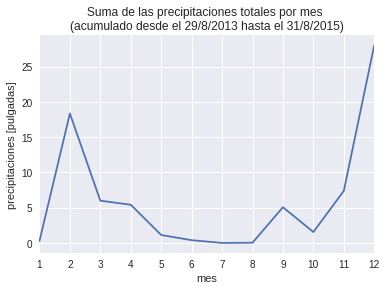

In [37]:
weather_convert['month'] =  pd.to_datetime(weather_convert['date']).dt.month

grouped_weather = weather_convert.groupby('month')['precipitation_inches'].sum()

grouped_weather.plot(title="Suma de las precipitaciones totales por mes \n(acumulado desde el 29/8/2013 hasta el 31/8/2015)", xticks=[1,2,3,4,5,6,7,8,9,10,11,12])
plt.xlabel("mes")
plt.ylabel("precipitaciones [pulgadas]")

Según se puede ver en el grafico, los picos donde se dan mayores precipitaciones son en febrero y en diciembre, donde también se dan la menor cantidad de viajes.

También se da un pico menor en septiembre, donde se había notado una pequeña reducción en la cantidad de viajes.

In [38]:
print (weather_convert.events.unique())
print (weather_convert.zip_code.unique())

[nan 'Fog' 'Rain' 'rain' 'Fog-Rain' 'Rain-Thunderstorm']
[94107 94063 94301 94041 95113]


In [39]:
# Se pasa mean_temperature a grados celsius
weather_convert['mean_temperature_f'] = (weather_convert.mean_temperature_f - 32)/1.8

/home/prp-admin/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


Analizamos el campo zip_code de la tabla 'weather' donde hay 5 claves distintas, y de 'trip' donde hay muchas claves que no corresponden a la bahia de san francisco.  Por lo tanto, creamos una tabla auxilar con los 5 zip_code correspondiente a dica bahia.

In [40]:
cityZipCodes = pd.DataFrame(data=[['San Francisco',94107],['San Jose',95113],['Redwood City',94063],['Mountain View',94041],['Palo Alto',94301]], columns=['city', 'zip_code'])
print (cityZipCodes)

            city  zip_code
0  San Francisco     94107
1       San Jose     95113
2   Redwood City     94063
3  Mountain View     94041
4      Palo Alto     94301


In [41]:
trip_convert = trips
trip_convert.start_date = pd.to_datetime(trip_convert.start_date, format='%m/%d/%Y %H:%M')
trip_convert.end_date = pd.to_datetime(trip_convert.end_date, format='%m/%d/%Y %H:%M')

trip_convert.zip_code = pd.to_numeric(trip_convert.zip_code, errors='coerce')
trip_convert = trip_convert[np.isfinite(trip_convert['zip_code'])]

trip_convert['dia'] = trip_convert.start_date.dt.weekday_name

trip_convert['start_date'] = trip_convert.start_date.dt.normalize()

/home/prp-admin/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/prp-admin/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [42]:
station_filter = stations.loc[:,['id','city']]
station_filter

,id,city
0,2,San Jose
1,3,San Jose
2,4,San Jose
3,5,San Jose
4,6,San Jose
5,7,San Jose
6,8,San Jose
7,9,San Jose
8,10,San Jose
9,11,San Jose


In [43]:
dfMergedZipCodes = pd.merge(weather_convert, cityZipCodes, how='inner', on='zip_code')
dfMergedZipCodes

,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code,month,city
0,2013-08-29,74.0,20.000000,61.0,61.0,58.0,56.0,93.0,75.0,57.0,...,23.0,11.0,28.0,0.00,4.0,NaN,286.0,94107,8,San Francisco
1,2013-08-30,78.0,20.555556,60.0,61.0,58.0,56.0,90.0,70.0,50.0,...,29.0,13.0,35.0,0.00,2.0,NaN,291.0,94107,8,San Francisco
2,2013-08-31,71.0,17.777778,57.0,57.0,56.0,54.0,93.0,75.0,57.0,...,26.0,15.0,31.0,0.00,4.0,NaN,284.0,94107,8,San Francisco
3,2013-09-01,74.0,18.888889,58.0,60.0,56.0,53.0,87.0,68.0,49.0,...,25.0,13.0,29.0,0.00,4.0,NaN,284.0,94107,9,San Francisco
4,2013-09-02,75.0,20.555556,62.0,61.0,60.0,58.0,93.0,77.0,61.0,...,23.0,12.0,30.0,0.00,6.0,NaN,277.0,94107,9,San Francisco
5,2013-09-03,73.0,19.444444,60.0,59.0,56.0,51.0,84.0,65.0,46.0,...,24.0,15.0,31.0,0.00,2.0,NaN,276.0,94107,9,San Francisco
6,2013-09-04,74.0,20.000000,61.0,59.0,57.0,56.0,90.0,72.0,53.0,...,29.0,19.0,35.0,0.00,4.0,NaN,269.0,94107,9,San Francisco
7,2013-09-05,72.0,18.888889,60.0,57.0,56.0,54.0,90.0,74.0,57.0,...,31.0,21.0,37.0,0.00,3.0,NaN,270.0,94107,9,San Francisco
8,2013-09-06,85.0,21.666667,56.0,57.0,51.0,45.0,86.0,58.0,29.0,...,24.0,8.0,28.0,0.00,0.0,NaN,287.0,94107,9,San Francisco
9,2013-09-07,88.0,22.777778,58.0,64.0,54.0,46.0,86.0,59.0,31.0,...,21.0,8.0,25.0,0.00,1.0,NaN,305.0,94107,9,San Francisco


In [45]:
tripsMergedCity = pd.merge(trip_convert, station_filter, how='inner', left_on='start_station_id', right_on='id')
tripsMergedCity

,id_x,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code,dia,id_y,city
0,4576,1.050000,2013-08-29,South Van Ness at Market,66,2013-08-29 14:14:00,South Van Ness at Market,66,520,Subscriber,94127.0,Thursday,66,San Francisco
1,4299,1.383333,2013-08-29,South Van Ness at Market,66,2013-08-29 12:04:00,Market at 10th,67,319,Subscriber,94103.0,Thursday,66,San Francisco
2,4760,1.883333,2013-08-29,South Van Ness at Market,66,2013-08-29 17:03:00,South Van Ness at Market,66,553,Subscriber,94103.0,Thursday,66,San Francisco
3,5070,2.800000,2013-08-29,South Van Ness at Market,66,2013-08-29 21:46:00,South Van Ness at Market,66,598,Subscriber,94115.0,Thursday,66,San Francisco
4,4765,3.800000,2013-08-29,South Van Ness at Market,66,2013-08-29 17:08:00,Market at 10th,67,553,Subscriber,94103.0,Thursday,66,San Francisco
5,4560,3.950000,2013-08-29,South Van Ness at Market,66,2013-08-29 14:02:00,San Francisco City Hall,58,438,Subscriber,94124.0,Thursday,66,San Francisco
6,4559,4.033333,2013-08-29,South Van Ness at Market,66,2013-08-29 14:02:00,San Francisco City Hall,58,554,Subscriber,94115.0,Thursday,66,San Francisco
7,4584,4.366667,2013-08-29,South Van Ness at Market,66,2013-08-29 14:21:00,South Van Ness at Market,66,587,Subscriber,94612.0,Thursday,66,San Francisco
8,5075,5.800000,2013-08-29,South Van Ness at Market,66,2013-08-29 21:52:00,Civic Center BART (7th at Market),72,598,Subscriber,94115.0,Thursday,66,San Francisco
9,4981,6.650000,2013-08-29,South Van Ness at Market,66,2013-08-29 19:47:00,Market at 10th,67,632,Subscriber,94110.0,Thursday,66,San Francisco


In [46]:
tripsMonday = tripsMergedCity[tripsMergedCity.dia == 'Monday']
tripsTuesday = tripsMergedCity[tripsMergedCity.dia == 'Tuesday']
tripsWednesday = tripsMergedCity[tripsMergedCity.dia == 'Wednesday']
tripsThursday = tripsMergedCity[tripsMergedCity.dia == 'Thursday']
tripsFriday = tripsMergedCity[tripsMergedCity.dia == 'Friday']
tripsSaturday = tripsMergedCity[tripsMergedCity.dia == 'Saturday']
tripsSunday = tripsMergedCity[tripsMergedCity.dia == 'Sunday']

In [47]:
print (trip_convert.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 652282 entries, 0 to 669958
Data columns (total 12 columns):
id                    652282 non-null int64
duration              652282 non-null float64
start_date            652282 non-null datetime64[ns]
start_station_name    652282 non-null object
start_station_id      652282 non-null int64
end_date              652282 non-null datetime64[ns]
end_station_name      652282 non-null object
end_station_id        652282 non-null int64
bike_id               652282 non-null int64
subscription_type     652282 non-null object
zip_code              652282 non-null float64
dia                   652282 non-null object
dtypes: datetime64[ns](2), float64(2), int64(4), object(4)
memory usage: 64.7+ MB
None


In [48]:
dfMergedMonday = pd.merge(tripsMonday, dfMergedZipCodes, left_on=['city','start_date'], right_on=['city','date'])
dfMergedThursday = pd.merge(tripsThursday, dfMergedZipCodes, left_on=['city','start_date'], right_on=['city','date'])
dfMergedWednesday = pd.merge(tripsWednesday, dfMergedZipCodes, left_on=['city','start_date'], right_on=['city','date'])
dfMergedTuesday = pd.merge(tripsTuesday, dfMergedZipCodes, left_on=['city','start_date'], right_on=['city','date'])
dfMergedFriday = pd.merge(tripsFriday, dfMergedZipCodes, left_on=['city','start_date'], right_on=['city','date'])
dfMergedSaturday = pd.merge(tripsSaturday, dfMergedZipCodes, left_on=['city','start_date'], right_on=['city','date'])
dfMergedSunday = pd.merge(tripsSunday, dfMergedZipCodes, left_on=['city','start_date'], right_on=['city','date'])

In [49]:
dfMergedMonday = pd.merge(tripsMonday, dfMergedZipCodes, left_on=['city','start_date'], right_on=['city','date'])
dfMergedThursday = pd.merge(tripsThursday, dfMergedZipCodes, left_on=['city','start_date'], right_on=['city','date'])
dfMergedWednesday = pd.merge(tripsWednesday, dfMergedZipCodes, left_on=['city','start_date'], right_on=['city','date'])
dfMergedTuesday = pd.merge(tripsTuesday, dfMergedZipCodes, left_on=['city','start_date'], right_on=['city','date'])
dfMergedFriday = pd.merge(tripsFriday, dfMergedZipCodes, left_on=['city','start_date'], right_on=['city','date'])
dfMergedSaturday = pd.merge(tripsSaturday, dfMergedZipCodes, left_on=['city','start_date'], right_on=['city','date'])
dfMergedSunday = pd.merge(tripsSunday, dfMergedZipCodes, left_on=['city','start_date'], right_on=['city','date'])

In [51]:
dfMergedGroupedCountMonday = dfMergedMonday.groupby('mean_temperature_f', as_index=False)['duration'].count()
dfMergedGroupedCountTuesday = dfMergedTuesday.groupby('mean_temperature_f', as_index=False)['duration'].count()
dfMergedGroupedCountWednesday = dfMergedWednesday.groupby('mean_temperature_f', as_index=False)['duration'].count()
dfMergedGroupedCountThursday = dfMergedThursday.groupby('mean_temperature_f', as_index=False)['duration'].count()
dfMergedGroupedCountFriday = dfMergedFriday.groupby('mean_temperature_f', as_index=False)['duration'].count()
dfMergedGroupedCountSaturday = dfMergedSaturday.groupby('mean_temperature_f', as_index=False)['duration'].count()
dfMergedGroupedCountSunday = dfMergedSunday.groupby('mean_temperature_f', as_index=False)['duration'].count()

In [52]:
dfMergedGroupedCountMonday

,mean_temperature_f,duration
0,3.333333,80
1,4.444444,9
2,6.666667,710
3,7.777778,1085
4,8.333333,18
5,8.888889,204
6,9.444444,1867
7,10.000000,219
8,10.555556,3840
9,11.111111,1730


Se agrupo por temperatura (el promedio del dia) y me quedo solo con las temperaturas en las cuales hay mas de 2000 viajes.
Me quedo con las temp. que estan entre 10.000000 <= T <= 22.222222 que son las que tienen almenos 2000 viajes

In [53]:
dfMergedGroupedMeanMonday = dfMergedMonday.groupby('mean_temperature_f', as_index=False)['duration'].mean()
dfMergedGroupedMeanMonday.columns = ['mean_temperature_f', 'Lunes']
dfMergedGroupedMeanTuesday = dfMergedTuesday.groupby('mean_temperature_f', as_index=False)['duration'].mean()
dfMergedGroupedMeanTuesday.columns = ['mean_temperature_f', 'Martes']
dfMergedGroupedMeanWednesday = dfMergedWednesday.groupby('mean_temperature_f', as_index=False)['duration'].mean()
dfMergedGroupedMeanWednesday.columns = ['mean_temperature_f', 'Miercoles']
dfMergedGroupedMeanThursday = dfMergedThursday.groupby('mean_temperature_f', as_index=False)['duration'].mean()
dfMergedGroupedMeanThursday.columns = ['mean_temperature_f', 'Jueves']
dfMergedGroupedMeanFriday = dfMergedFriday.groupby('mean_temperature_f', as_index=False)['duration'].mean()
dfMergedGroupedMeanFriday.columns = ['mean_temperature_f', 'Viernes']
dfMergedGroupedMeanSaturday = dfMergedSaturday.groupby('mean_temperature_f', as_index=False)['duration'].mean()
dfMergedGroupedMeanSaturday.columns = ['mean_temperature_f', 'Sabado']
dfMergedGroupedMeanSunday = dfMergedSunday.groupby('mean_temperature_f', as_index=False)['duration'].mean()
dfMergedGroupedMeanSunday.columns = ['mean_temperature_f', 'Domingo']
#dfMergedGroupedMean

dfMergedGroupedMean = pd.merge(dfMergedGroupedMeanMonday, dfMergedGroupedMeanTuesday, on='mean_temperature_f')
dfMergedGroupedMean = pd.merge(dfMergedGroupedMean, dfMergedGroupedMeanWednesday, on='mean_temperature_f')
dfMergedGroupedMean = pd.merge(dfMergedGroupedMean, dfMergedGroupedMeanThursday, on='mean_temperature_f')
dfMergedGroupedMean = pd.merge(dfMergedGroupedMean, dfMergedGroupedMeanFriday, on='mean_temperature_f')
dfMergedGroupedMean = pd.merge(dfMergedGroupedMean, dfMergedGroupedMeanSaturday, on='mean_temperature_f')
dfMergedGroupedMean = pd.merge(dfMergedGroupedMean, dfMergedGroupedMeanSunday, on='mean_temperature_f')
dfMergedGroupedMean

,mean_temperature_f,Lunes,Martes,Miercoles,Jueves,Viernes,Sabado,Domingo
0,8.333333,5.906481,13.350359,32.731875,23.336357,11.923851,45.492519,41.914577
1,8.888889,17.787908,7.450000,12.529728,33.130556,13.211585,37.971111,23.793275
2,9.444444,11.375272,10.813884,15.346040,32.535000,8.328415,86.843035,149.624074
3,10.000000,24.852359,12.728471,6.799180,10.487613,19.216444,27.234787,27.929357
4,10.555556,11.889657,8.891531,11.702379,11.404123,14.945305,24.745060,44.462719
5,11.111111,17.863632,12.714300,24.396759,15.487156,17.665095,31.008234,20.399662
6,11.666667,16.236596,11.122850,17.315669,12.204904,33.292219,34.422272,33.460458
7,12.222222,12.561756,11.077794,17.116761,17.790535,17.698407,40.212606,47.661179
8,12.777778,12.347118,11.998750,11.342103,11.132664,12.810643,48.402712,31.082679
9,13.333333,12.424228,16.730990,11.444917,11.565952,13.866825,32.656124,33.229264


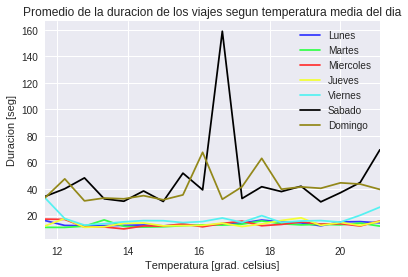

In [54]:
dfPlot = dfMergedGroupedMean[(dfMergedGroupedMean.mean_temperature_f >= 11.66666) & (dfMergedGroupedMean.mean_temperature_f <= 21.2)]
#plot(x='mean_temperature_f',y='duration')


dfPlot.plot(x='mean_temperature_f', title="Promedio de la duracion de los viajes segun temperatura media del dia",
            color=['#3336FF','#33FF49','#FF3333','#F3FF33','#55F1F1','#000000','#93881A'])
plt.legend = [1,2,3,4,5]
plt.xlabel("Temperatura [grad. celsius]")
plt.ylabel("Duracion [seg]")
#plt.ylim([0,9000])
#plt.colors = ['b','o','r','y','m']
#plt.figure()
#with pd.plot_params.use('x_compat', True):
 #   dfPlot.duration.plot(color='r')

In [55]:
dfPlot

,mean_temperature_f,Lunes,Martes,Miercoles,Jueves,Viernes,Sabado,Domingo
6,11.666667,16.236596,11.122850,17.315669,12.204904,33.292219,34.422272,33.460458
7,12.222222,12.561756,11.077794,17.116761,17.790535,17.698407,40.212606,47.661179
8,12.777778,12.347118,11.998750,11.342103,11.132664,12.810643,48.402712,31.082679
9,13.333333,12.424228,16.730990,11.444917,11.565952,13.866825,32.656124,33.229264
10,13.888889,12.597199,11.888255,9.943807,14.121145,15.294917,30.813285,32.636053
11,14.444444,12.917905,11.332911,12.155146,14.415391,16.207966,38.533862,35.005095
12,15.000000,12.210277,11.570183,12.077160,12.274820,16.126483,30.643065,31.875177
13,15.555556,13.137208,12.364527,13.737720,12.410238,14.707745,51.968549,35.584056
14,16.111111,12.291826,13.019308,11.536522,12.651053,15.487346,39.375611,67.696718
15,16.666667,13.852008,12.793341,14.024022,14.302939,18.182917,158.945789,32.287371


In [56]:
dfPlot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 6 to 23
Data columns (total 8 columns):
mean_temperature_f    18 non-null float64
Lunes                 18 non-null float64
Martes                18 non-null float64
Miercoles             18 non-null float64
Jueves                18 non-null float64
Viernes               18 non-null float64
Sabado                18 non-null float64
Domingo               18 non-null float64
dtypes: float64(8)
memory usage: 1.3 KB


Analizamos la disponibilidad de las bicicletas segun dia y horario.

In [ ]:
status = pd.read_csv("Data/status.csv")

In [ ]:
# Convierto el campo time en datetime
status_convert = status
status_convert.time = pd.to_datetime(status_convert.time) 

print status_convert

In [ ]:
status_convert.info(null_counts=True)

In [ ]:
status_convert.describe()

In [ ]:
# Agrego el campo weekday y hour, y elimino time para liberar un poco la memoria
status_convert['weekday'] =  pd.to_datetime(status_convert['time']).dt.weekday
status_convert['hour'] = pd.to_datetime(status_convert['time']).dt.hour
status_convert = status_convert.drop('time', 1)

In [ ]:
# Esto va a servir mas adelante para graficar
days = ['Lunes','Martes','Miercoles','Jueves','Viernes','Sabado','Domingo']
labels = []
for day in days:
    for h in range(12):
        labels.append(day + ' - ' + str(h*2))

Segun el analisis exploratorio que se realizo anteriormente, elijo 2 de las estaciones mas usadas, 2 del medio y 2 de las menos usadas para graficar como varia la disponibilidad de bicicletas durante los dias de la semana.

Mas usadas: 70, 69
En el medio: 28, 46
Menos usadas: 21, 24
(los números son ids)

In [ ]:
# Estacion 70
df_station = status_convert[status_convert.station_id == 70]
print df_station
#dfGrouped = df.groupby(['weekday',df.hour-(df.hour%2)])['bikes_available'].count()
#print dfGrouped

In [ ]:
dfGrouped = df_station.groupby(['weekday',df_station.hour-(station_70.hour%2)])['bikes_available'].mean()
print dfGrouped

In [ ]:
plt.figure()
dfGrouped.plot(kind='bar',figsize=(30,8), title="Disponibilidad de bicicletas segun dia y hora en la estacion San Francisco Caltrain (Townsend at 4th)").set_xticklabels(labels)
plt.xlabel("dia - hora")
plt.ylabel("disponibilidad de bicicletas")

In [ ]:
# Estación 69
df_station = status_convert[status_convert.station_id == 69]
dfGrouped = df_station.groupby(['weekday',df_station.hour-(df_station.hour%2)])['bikes_available'].mean()
plt.figure()
dfGrouped.plot(kind='bar',figsize=(30,8), title="Disponibilidad de bicicletas segun dia y hora San Francisco Caltrain 2 (330 Townsend)").set_xticklabels(labels)
plt.xlabel("dia - hora")
plt.ylabel("disponibilidad de bicicletas")

In [ ]:
# Estación 28
df_station = status_convert[status_convert.station_id == 28]
dfGrouped = df_station.groupby(['weekday',df_station.hour-(df_station.hour%2)])['bikes_available'].mean()
plt.figure()
dfGrouped.plot(kind='bar',figsize=(30,8), title="Disponibilidad de bicicletas segun dia y hora Mountain View Caltrain Station").set_xticklabels(labels)
plt.xlabel("dia - hora")
plt.ylabel("disponibilidad de bicicletas")

In [ ]:
# Estación 46
df_station = status_convert[status_convert.station_id == 46]
dfGrouped = df_station.groupby(['weekday',df_station.hour-(df_station.hour%2)])['bikes_available'].mean()
plt.figure()
dfGrouped.plot(kind='bar',figsize=(30,8), title="Disponibilidad de bicicletas segun dia y hora Washington at Kearney").set_xticklabels(labels)
plt.xlabel("dia - hora")
plt.ylabel("disponibilidad de bicicletas")

In [ ]:
# Estación 21
df_station = status_convert[status_convert.station_id == 21]
dfGrouped = df_station.groupby(['weekday',df_station.hour-(df_station.hour%2)])['bikes_available'].mean()
plt.figure()
dfGrouped.plot(kind='bar',figsize=(30,8), title="Disponibilidad de bicicletas segun dia y hora Franklin at Maple").set_xticklabels(labels)
plt.xlabel("dia - hora")
plt.ylabel("disponibilidad de bicicletas")

In [ ]:
# Estación 24
df_station = status_convert[status_convert.station_id == 24]
dfGrouped = df_station.groupby(['weekday',df_station.hour-(df_station.hour%2)])['bikes_available'].mean()
plt.figure()
dfGrouped.plot(kind='bar',figsize=(30,8), title="Disponibilidad de bicicletas segun dia y hora Redwood City Public Library").set_xticklabels(labels)
plt.xlabel("dia - hora")
plt.ylabel("disponibilidad de bicicletas")

Según se pudo observar en los gráficos, las diferencias más notorias se dan en las estaciones que tienen más tráfico.
En las estaciones más usadas se nota una clara diferencia en la disponibilidad de las bicicletas entre las 8 y las 16 horas de los días hábiles, habiendo menos disponibilidad. En las estaciones del medio la diferencia se sigue notando, pero ya no es tan marcada, mientras que en las estaciones menos usadas ya no se alcanza a notar un patron claro.

